## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



#**In this project we are going to analyze the World Bank EdStats Data in order to find out valuable insights.**

#**The following Indicators have been chosen for analysis:-**

##Economy:-

GDP at market prices (current US$)	NY.GDP.MKTP.CD

GDP per capita (current US$)	NY.GDP.PCAP.CD

##Early Childhood Education:-

Out-of-school children of primary school age, both sexes (number)	SE.PRM.UNER

Enrolment in pre-primary education, female (number)	SE.PRE.ENRL.FE

Enrolment in secondary education, female (number)	SE.SEC.ENRL.FE

Enrolment in tertiary education, all programmes, female (number)	SE.TER.ENRL.FE

Pupil-teacher ratio in primary education (headcount basis)	SE.PRM.ENRL.TC.ZS

##Expenditures:-

Government expenditure on education as % of GDP (%) - SE.XPD.TOTL.GD.ZS

Expenditure on education as % of total government expenditure (%) SE.XPD.TOTL.GB.ZS





#Importing Necessary Modules and Libraries

We are importing following libraries for their respective applications:

Pandas:- Pandas is used to analyze data. It has functions for analyzing, cleaning, exploring, and manipulating data.

Matplotlib:- Matplotlib is a graph plotting library in python that serves as a visualization utility. Most of the Matplotlib utilities lies under the pyplot submodule.

In [ ]:
# Importing packages like Pandas,Numpy, Matplotlib, Seaborn & plotly.graph_objects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from google.colab import drive

In [ ]:
# Mounting drive to import files from google drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('max_columns', None, 'max_rows', None, 'display.max_columns', None, 'display.max_rows',None)

#**Loading and Discovering Data**


---


Now, we need to load our data from the external source, which in this case is uploaded to the drive. Also we would try to spot the nature and properties of the data that we have. The data is divided into 5 different CSV files, each containing the information as follows:

**1.EdStatsData**:- This file contains Education Statistics data (from ear 1970 to 2100) of all the countries that are World Bank members and this data is dependent on various indicators that resembles various factors that affect the overall Education growth and development of the country. These indicators can be access, availabilty, teachers, expenditures, population, lieracy, assessments etc.

**2.EdStatsCountry**:- This file contains information from census and surveys across various departments, segregated in a country-wise manner

**3.EdStatsCountry-Series**:- This file contains the Series Code for various indicators, as well as the Data sources from which they have been derived

**4.EdStatsFootNote**:- This file contains year wise indicator names along with their respective descrption. It tells us the nature of the indicators, if its and estimate value or a percentage distribution etc. From context of our analysis this information isn't quite useful, since its already evident with the type of data EdStatsData holds.

**5.EdStatsSeries**:- This file contains regional learning assessments data(e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data.

In [ ]:
# Loading all the csv files.
path1=('/content/drive/MyDrive/World Bank Education EDA-Saransh Jain/Data Sets/EdStatsCountry-Series.csv')
path2=('/content/drive/MyDrive/World Bank Education EDA-Saransh Jain/Data Sets/EdStatsCountry.csv')
path3=('/content/drive/MyDrive/World Bank Education EDA-Saransh Jain/Data Sets/EdStatsData.csv')
path4=('/content/drive/MyDrive/World Bank Education EDA-Saransh Jain/Data Sets/EdStatsFootNote.csv')
path5=('/content/drive/MyDrive/World Bank Education EDA-Saransh Jain/Data Sets/EdStatsSeries.csv')


In [ ]:
# Reading the csv files and making df from it
Ed_stats_data_df = pd.read_csv(path1)
country_df=pd.read_csv(path2)
main_data=pd.read_csv(path3)
new_data=pd.read_csv(path3)
Ed_stats_footnote_df = pd.read_csv(path4)
Ed_stats_series_df = pd.read_csv(path5) 

###***Getting overview of data***

In [ ]:
# Shape of main data
main_data.shape

(886930, 70)

In [ ]:
# Displaying the first few rows of main Data.
main_data.head(7)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,60.999962,61.922680,62.693420,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.041870,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.811760,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.245140,86.101669,85.511940,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,50.046188,51.245281,52.242321,54.754372,56.486790,57.314659,58.226051,59.289230,60.748180,61.520870,62.734951,64.115883,65.099663,65.129204,65.827492,66.797028,63.260429,63.972111,67.033043,65.761559,68.780800,69.267052,70.435387,72.047287,73.275620,75.132980,76.641022,77.653580,78.485397,79.475769,79.608330,80.582420,81.473801,81.695686,82.871651,82.861389,84.401413,83.914032,83.820831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,0.699950,0.710140,0.718430,0.743740,0.759440,0.769250,0.779860,0.790710,0.799610,0.806770,0.816060,0.825130,0.834190,0.834760,0.844660,0.854320,0.826490,0.834080,0.859090,0.847310,0.872660,0.872690,0.884940,0.897370,0.904060,0.912750,0.919790,0.926300,0.927680,0.930840,0.929620,0.938460,0.942500,0.943470,0.947620,0.946700,0.962080,0.964090,0.966200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
# Displaying the last few rows of main Data.
main_data.tail(7)

,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Zimbabwe,"Youth illiterate population, 15-24 years, both...",UIS.LP.AG15T24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102022.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,295605.00000,NaN,NaN,311114.00000,NaN
Zimbabwe,"Youth illiterate population, 15-24 years, fema...",UIS.LP.AG15T24.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117088.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63222.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128926.00000,NaN,NaN,111650.00000,NaN
Zimbabwe,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47631.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38800.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166679.00000,NaN,NaN,199464.00000,NaN
Zimbabwe,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.021851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.411362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.93070,NaN,NaN,90.42812,NaN
Zimbabwe,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.812241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.353439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.12456,NaN,NaN,93.18835,NaN
Zimbabwe,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.903920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.977340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.02828,NaN,NaN,1.06389,NaN
Zimbabwe,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.826958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.540619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.59058,NaN,NaN,87.59186,NaN


In [ ]:
# Displaying the info of main data
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [ ]:
main_data.isnull().sum()/len(main_data)*100

Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1970               91.849639
1971               95.993258
1972               95.984012
1973               95.992356
1974               95.971497
1975               90.156382
1976               95.773849
1977               95.763589
1978               95.763364
1979               95.849842
1980               89.951631
1981               95.627953
1982               95.770692
1983               95.663694
1984               95.647233
1985               89.819264
1986               95.560867
1987               95.643286
1988               95.653321
1989               95.767422
1990               85.973527
1991               91.607342
1992               91.482642
1993               91.454455
1994               91.266278
1995               85.189248
1996               91.340128
1997               91.718287
1998               90.426076
1999               86.601085
2000          

In [ ]:
# Using the describe function to analyze the nature and paradigm of main data.
main_data.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,8.912200e+04,3.877700e+04,3.751100e+04,3.846000e+04,3.860600e+04,9.029600e+04,3.937200e+04,3.864100e+04,3.855200e+04,3.754000e+04,1.244050e+05,7.443700e+04,7.554300e+04,7.579300e+04,7.746200e+04,1.313610e+05,7.680700e+04,7.345300e+04,8.491400e+04,1.188390e+05,1.766760e+05,1.235090e+05,1.242050e+05,1.303630e+05,1.288140e+05,1.841080e+05,1.403120e+05,1.372720e+05,1.343870e+05,1.421080e+05,2.424420e+05,1.460120e+05,1.472640e+05,1.375090e+05,1.137890e+05,1.310580e+05,1.646000e+04,143.000000,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,3.283898e+09,7.664969e+09,7.913722e+09,7.856908e+09,8.118002e+09,3.622763e+09,9.156550e+09,1.014901e+10,1.104709e+10,1.195436e+10,9.084424e+09,1.571674e+10,1.604668e+10,1.643532e+10,1.684022e+10,1.052543e+10,1.874630e+10,2.027385e+10,1.794678e+10,1.331558e+10,9.423384e+09,1.384867e+10,1.428299e+10,1.449393e+10,1.589729e+10,1.188637e+10,1.684674e+10,1.872300e+10,2.029794e+10,1.894907e+10,1.189592e+10,2.117911e+10,2.176323e+10,2.425332e+10,2.678449e+10,2.353720e+10,1.934411e+11,2.160839,5.780697e+02,6.054774e+02,6.315916e+02,6.556516e+02,6.751516e+02,6.911287e+02,7.040640e+02,7.145788e+02,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,1.780774e+11,2.744142e+11,2.790549e+11,2.823809e+11,2.940635e+11,2.002929e+11,3.264675e+11,3.535351e+11,3.804257e+11,4.014873e+11,3.665667e+11,4.881357e+11,5.012055e+11,5.121962e+11,5.292982e+11,4.285218e+11,5.812586e+11,6.142357e+11,5.859148e+11,5.153472e+11,4.442374e+11,5.449242e+11,5.622886e+11,5.803607e+11,6.278337e+11,5.576181e+11,6.851484e+11,7.465688e+11,7.944132e+11,7.623650e+11,6.218710e+11,8.555853e+11,8.833955e+11,9.513016e+11,1.023180e+12,9.732465e+11,2.839188e+12,0.810584,1.475072e+04,1.577305e+04,1.678556e+04,1.778666e+04,1.874408e+04,1.965409e+04,2.052941e+04,2.136851e+04,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,-1.404240e+00,-1.478345e+00,-2.358765e+00,-2.867273e+00,-2.800548e+00,-2.216315e+00,-1.556722e+00,-1.410886e+00,-1.425202e+00,-1.562425e+00,-1.803750e+00,-5.814339e+00,-5.089333e+00,-6.184857e+00,-4.792691e+00,-2.697722e+00,-3.820174e+00,-2.517245e+00,-6.086200e+04,-6.526000e+04,-6.759300e+04,-6.973700e+04,-9.214300e+04,-1.111860e+05,-1.262600e+05,-1.347240e+05,-3.708940e+05,-3.882170e+05,-4.088540e+05,-4.561240e+05,-4.969050e+05,-5.709940e+05,-6.049930e+05,-6.157480e+05,-8.900000e+01,-2.467847e+00,-1.797539e+00,1.000000,-1.870000e+00,-2.000000e+00,-2.110000e+00,-2.150000e+00,-2.140000e+00,-2.090000e+00,-1.980000e+00,-1.830000e+00,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,1.770000e+00,9.468690e+00,9.989330e+00,9.581825e+00,9.068048e+0

In [ ]:
# Using to column attribute to see what type of information is stored in  main data.
main_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [ ]:
# After reading the data we 1st droped all the columns that had null data. 
# Dropped null value  columns
main_data.drop(['2016','2017','2020','2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],axis=1,inplace=True)


In [ ]:
# Dropping of the 'Country Code' from main data. 
main_data.drop(['Country Code'],axis=1,inplace=True)

###***Creating dataframes for EDA which will be used in this notebook for analysis.***

In [ ]:
# Making "Country Name" column index so that we can apply .loc in order to make dataframe on the basis of region and income group.
main_data.set_index(['Country Name'],inplace=True)

In [137]:
# Displaying the first few rows of main Data.
main_data.head(7)

,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Arab World,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,60.999962,61.922680,62.693420,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.041870,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.811760,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.245140,86.101669,85.511940,85.320152,NaN
Arab World,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,50.046188,51.245281,52.242321,54.754372,56.486790,57.314659,58.226051,59.289230,60.748180,61.520870,62.734951,64.115883,65.099663,65.129204,65.827492,66.797028,63.260429,63.972111,67.033043,65.761559,68.780800,69.267052,70.435387,72.047287,73.275620,75.132980,76.641022,77.653580,78.485397,79.475769,79.608330,80.582420,81.473801,81.695686,82.871651,82.861389,84.401413,83.914032,83.820831,NaN
Arab World,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,0.699950,0.710140,0.718430,0.743740,0.759440,0.769250,0.779860,0.790710,0.799610,0.806770,0.816060,0.825130,0.834190,0.834760,0.844660,0.854320,0.826490,0.834080,0.859090,0.847310,0.872660,0.872690,0.884940,0.897370,0.904060,0.912750,0.919790,0.926300,0.927680,0.930840,0.929620,0.938460,0.942500,0.943470,0.947620,0.946700,0.962080,0.964090,0.966200,NaN


In [ ]:
# Making df for specific income group.
Income_df=main_data.loc[['Heavily indebted poor countries (HIPC)', 'High income','Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income','Middle income']]

In [138]:
# Displaying the first few rows of main Data.
Income_df.head(7)

,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Heavily indebted poor countries (HIPC),"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Heavily indebted poor countries (HIPC),"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Heavily indebted poor countries (HIPC),"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Heavily indebted poor countries (HIPC),"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Heavily indebted poor countries (HIPC),"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,37.316650,38.169151,38.848789,40.491741,42.357971,43.896141,45.257690,46.410759,48.069950,49.225300,48.553391,49.282330,49.051182,48.854191,48.829220,48.139969,48.039871,46.918369,45.771809,47.015720,46.096401,45.920551,46.919521,48.913181,48.916901,51.579689,52.246330,52.179199,54.087799,56.701599,60.194759,63.090672,65.647476,68.346817,70.743523,72.719498,75.937141,76.088966,76.065514,77.511467,78.707336,79.900002,80.689568,NaN
Heavily indebted poor countries (HIPC),"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,NaN,NaN,29.998329,31.002251,31.860941,33.705379,35.734921,37.401310,38.834862,40.107750,41.955521,43.243111,42.492821,43.217831,43.001179,42.818489,43.014851,42.322701,42.435459,41.318138,40.214539,41.807522,41.086048,41.033421,42.120972,43.822231,43.586788,46.295738,47.202068,47.622410,49.500938,52.309921,56.012161,59.130661,62.057121,64.728371,67.382301,69.390266,72.781113,73.158539,73.323387,74.871628,76.430260,77.681122,78.576210,NaN
Heavily indebted poor countries (HIPC),"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,NaN,NaN,0.672910,0.684700,0.695990,0.713830,0.730460,0.743120,0.752380,0.761840,0.775310,0.784320,0.779150,0.781960,0.781510,0.781170,0.788220,0.785360,0.792000,0.787720,0.784520,0.801550,0.804950,0.808690,0.815530,0.812620,0.804710,0.815310,0.825010,0.840410,0.844690,0.857150,0.870860,0.882600,0.896950,0.900110,0.909940,0.913120,0.920830,0.926440,0.930980,0.934660,0.944210,0.946400,0.949380,NaN


In [139]:
# Displaying the last few rows of main Data.
Income_df.tail(7)

,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Middle income,"Youth illiterate population, 15-24 years, both...",UIS.LP.AG15T24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Middle income,"Youth illiterate population, 15-24 years, fema...",UIS.LP.AG15T24.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.810390e+07,8.810390e+07,8.810390e+07,8.810390e+07,8.810390e+07,8.810390e+07,8.810390e+07,8.810390e+07,8.810390e+07,8.810390e+07,6.563793e+07,6.563793e+07,6.563793e+07,6.563793e+07,6.563793e+07,6.563793e+07,6.563793e+07,6.563793e+07,6.563793e+07,6.563793e+07,4.620482e+07,4.620482e+07,4.620482e+07,4.620482e+07,4.620482e+07,4.620482e+07,4.620482e+07,4.620482e+07,4.620482e+07,4.620482e+07,NaN
Middle income,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Middle income,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.271026e+01,8.271026e+01,8.271026e+01,8.271026e+01,8.271026e+01,8.271026e+01,8.271026e+01,8.271026e+01,8.271026e+01,8.271026e+01,8.779494e+01,8.779494e+01,8.779494e+01,8.779494e+01,8.779494e+01,8.779495e+01,8.779494e+01,8.779494e+01,8.779494e+01,8.779494e+01,9.195965e+01,9.195965e+01,9.195965e+01,9.195965e+01,9.195965e+01,9.195965e+01,9.195965e+01,9.195965e+01,9.195965e+01,9.195965e+01,NaN
Middle income,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.764710e+01,7.764710e+01,7.764710e+01,7.764710e+01,7.764710e+01,7.764710e+01,7.764710e+01,7.764710e+01,7.764710e+01,7.764710e+01,8.447813e+01,8.447813e+01,8.447813e+01,8.447813e+01,8.447813e+01,8.447813e+01,8.447813e+01,8.447813e+01,8.447813e+01,8.447813e+01,9.014725e+01,9.014725e+01,9.014725e+01,9.014725e+01,9.014725e+01,9.014726e+01,9.014725e+01,9.014725e+01,9.014725e+01,9.014725e+01,NaN
Middle income,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.900000e-01,8.900000e-01,8.900000e-01,8.900000e-01,8.900000e-01,8.900000e-01,8.900000e-01,8.900000e-01,8.900000e-01,8.900000e-01,9.300000e-01,9.300000e-01,9.300000e-01,9.300000e-01,9.300000e-01,9.300000e-01,9.300000e-01,9.300000e-01,9.300000e-01,9.300000e-01,9.600000e-01,9.600000e-01,9.600000e-01,9.600000e-01,9.600000e-01,9.600000e-01,9.600000e-01,9.600000e-01,9.600000e-01,9.600000e-01,NaN
Middle income,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.761914e+01,8.761914e+01,8.761914e+01,8.761914e+01,8.761914e+01,8.761914e+01,8.761914e+01,8.761914e+01,8.761914e+01,8.761914e+01,9.099763e+01,9.099763e+01,9.099763e+01,9.099763e+01,9.099763e+01,9.099763e+01,9.099763e+01,9.099763e+01,9.099763e+01,9.099763e+01,9.370238e+01,9.370238e+01,9.370238e+01,9.370238e+01,9.370238e+01,9.370238e+01,9.370238e+01,9.370238e+01,9.370238e+01,9.370238e+01,NaN


In [ ]:
# Making df for specific region.
Region_df=main_data.loc[['World','Arab World','East Asia & Pacific','East Asia & Pacific (excluding high income)','Europe & Central Asia','Europe & Central Asia (excluding high income)','European Union','Euro area','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Middle East & North Africa','Middle East & North Africa (excluding high income)','North America','OECD members','Least developed countries: UN classification','South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)']]

In [140]:
# Displaying the first few rows of main Data.
Region_df.head(7)

,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
World,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
World,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
World,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
World,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
World,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,72.353142,72.258461,73.130409,75.258324,75.926712,77.053207,77.671318,77.64193,76.567047,76.882843,78.008720,78.739258,79.171501,79.410240,79.651604,80.246422,81.013268,81.318687,81.945198,82.377724,82.318047,82.638046,82.590897,82.715782,82.828880,82.582642,82.397293,82.698830,83.322060,84.134033,84.990417,85.428032,86.442413,87.696312,88.759911,88.83577,89.233521,90.410072,90.643913,90.512466,90.719559,90.883148,91.206787,91.172462,91.264053,91.155090
World,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,64.631348,64.215652,65.329391,68.394127,69.403061,71.072060,71.730782,71.07077,69.016350,69.128830,70.422897,71.438263,72.004921,72.393677,72.938469,74.142120,75.545212,76.168037,77.179314,77.804558,77.720917,78.159737,78.153481,78.561974,78.948914,78.797974,78.827164,79.271248,80.013313,81.123734,82.176811,82.773438,83.930893,86.059334,87.242661,87.44416,88.032249,89.167412,89.643944,89.811249,90.064247,90.317940,90.486214,90.397507,90.450974,90.334671
World,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.810440,0.803080,0.810500,0.835730,0.844490,0.858430,0.860330,0.84655,0.823420,0.819820,0.825810,0.833340,0.837040,0.840660,0.847480,0.861320,0.875980,0.883160,0.892210,0.896870,0.896300,0.899240,0.900080,0.906330,0.912390,0.914250,0.918790,0.922230,0.925420,0.932410,0.937200,0.941020,0.944690,0.964010,0.970930,0.96956,0.973360,0.973050,0.978300,0.984460,0.984010,0.987160,0.984670,0.984080,0.983410,NaN


In [141]:
# Displaying the last few rows of main Data.
Region_df.tail(7)

,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Sub-Saharan Africa (excluding high income),"Youth illiterate population, 15-24 years, both...",UIS.LP.AG15T24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.406730e+07,4.406730e+07,4.406730e+07,4.406730e+07,4.406730e+07,4.406730e+07,4.406730e+07,4.406730e+07,4.406730e+07,4.406730e+07,4.953328e+07,4.953328e+07,4.953328e+07,4.953328e+07,4.953328e+07,4.953328e+07,4.953328e+07,4.953328e+07,4.953328e+07,4.953328e+07,NaN
Sub-Saharan Africa (excluding high income),"Youth illiterate population, 15-24 years, fema...",UIS.LP.AG15T24.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.674487e+07,2.674487e+07,2.674487e+07,2.674487e+07,2.674487e+07,2.674487e+07,2.674487e+07,2.674487e+07,2.674487e+07,2.674487e+07,2.916320e+07,2.916320e+07,2.916320e+07,2.916320e+07,2.916320e+07,2.916320e+07,2.916320e+07,2.916320e+07,2.916320e+07,2.916320e+07,NaN
Sub-Saharan Africa (excluding high income),"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.732243e+07,1.732243e+07,1.732243e+07,1.732243e+07,1.732243e+07,1.732243e+07,1.732243e+07,1.732243e+07,1.732243e+07,1.732243e+07,2.037008e+07,2.037008e+07,2.037008e+07,2.037008e+07,2.037008e+07,2.037008e+07,2.037008e+07,2.037008e+07,2.037008e+07,2.037008e+07,NaN
Sub-Saharan Africa (excluding high income),"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.813468e+01,6.813468e+01,6.813468e+01,6.813468e+01,6.813468e+01,6.813468e+01,6.813468e+01,6.813468e+01,6.813468e+01,6.813468e+01,7.141136e+01,7.141136e+01,7.141136e+01,7.141136e+01,7.141136e+01,7.141136e+01,7.141136e+01,7.141136e+01,7.141136e+01,7.141136e+01,NaN
Sub-Saharan Africa (excluding high income),"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.161353e+01,6.161353e+01,6.161353e+01,6.161353e+01,6.161353e+01,6.161353e+01,6.161353e+01,6.161353e+01,6.161353e+01,6.161353e+01,6.636328e+01,6.636328e+01,6.636328e+01,6.636328e+01,6.636328e+01,6.636328e+01,6.636328e+01,6.636328e+01,6.636328e+01,6.636328e+01,NaN
Sub-Saharan Africa (excluding high income),"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.200000e-01,8.200000e-01,8.200000e-01,8.200000e-01,8.200000e-01,8.200000e-01,8.200000e-01,8.200000e-01,8.200000e-01,8.200000e-01,8.600000e-01,8.600000e-01,8.600000e-01,8.600000e-01,8.600000e-01,8.600000e-01,8.600000e-01,8.600000e-01,8.600000e-01,8.600000e-01,NaN
Sub-Saharan Africa (excluding high income),"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.529188e+01,7.529188e+01,7.529188e+01,7.529188e+01,7.529188e+01,7.529188e+01,7.529188e+01,7.529188e+01,7.529188e+01,7.529188e+01,7.685796e+01,7.685796e+01,7.685796e+01,7.685796e+01,7.685796e+01,7.685796e+01,7.685796e+01,7.685796e+01,7.685796e+01,7.685796e+01,NaN


###***GDP analysis of World for the year 2015***








Q1. Show GDP of world on map.

In [ ]:
# Creating data frame using path3 and cleaning the data
exp1_2=pd.read_csv(path3)

# Indicator Code for world GDP is NY.GDP.MKTP.CD
exp1_2.set_index('Indicator Code',inplace=True)
exp2_2=exp1_2.loc[['NY.GDP.MKTP.CD'],['Country Name','Country Code','2015']]

# Droping region wise data in order to get only data for countries and droping null values as well.
exp2_2.set_index('Country Name',inplace=True)
exp3_2=exp2_2.drop(['Heavily indebted poor countries (HIPC)', 'High income','Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income','Middle income','World','Arab World','East Asia & Pacific','East Asia & Pacific (excluding high income)','Europe & Central Asia','Europe & Central Asia (excluding high income)','European Union','Euro area','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Middle East & North Africa','Middle East & North Africa (excluding high income)','North America','OECD members','Least developed countries: UN classification','South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)','Upper middle income'],axis=0).dropna()
exp3_2.reset_index('Country Name',inplace=True)


In [ ]:
# Using plotly.graph_objects to plot the values of GDP of each country on world map to make a chloropleth.

# Giving country code to plotly so it can read code and match it with the inbuilt graph and further data to add in the chloropleth. 
fig = go.Figure(data=go.Choropleth(
    locations = exp3_2['Country Code'],
    z = exp3_2["2015"],
    text = exp3_2['Country Name'],
    colorscale = 'RdYlGn',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'GDP',
))

# Making the layout of the map and giving annotations.
fig.update_layout(
    title_text='GDP of Countries',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text = '',
        showarrow = False
    )]
)

fig.show()

##***Inferrence***


---


GDP at market price of all the countries in the world in year 2015 have been ploted on the map, with color coding.

Which gives an overview about the economic condition of the world in year 2015.




**Q2**. Calculate the mean GDP of world and mean per capita GDP of world and show Countries above mean GDP of world and mean per capita of world?










In [ ]:
# Mean GDP
# Creating data set by droping unwanted data on indicator code NY.GDP.MKTP.CD

graph_3a=main_data.loc[main_data['Indicator Code']=='NY.GDP.MKTP.CD','2015'].drop(['Heavily indebted poor countries (HIPC)', 
                                                                                   'High income','Least developed countries: UN classification', 
                                                                                   'Low & middle income', 'Low income', 
                                                                                   'Lower middle income','Middle income','World','Arab World',
                                                                                   'East Asia & Pacific','East Asia & Pacific (excluding high income)',
                                                                                   'Europe & Central Asia','Europe & Central Asia (excluding high income)',
                                                                                   'European Union','Euro area','Latin America & Caribbean',
                                                                                   'Latin America & Caribbean (excluding high income)',
                                                                                   'Middle East & North Africa','Middle East & North Africa (excluding high income)',
                                                                                   'North America','OECD members','Least developed countries: UN classification',
                                                                                   'South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)',
                                                                                   'Upper middle income'],axis=0).dropna()

# Creating dataframe for the countries having GDP above mean GDP.

df = graph_3a.to_frame(name="2015")
country_above_mean_gdp=df[df['2015']>np.mean(df['2015'])]
Mean_GDP = np.mean(df['2015'])
print(f'{Mean_GDP}is the Mean GDP of world.')



374979491861.97833is the Mean GDP of world.


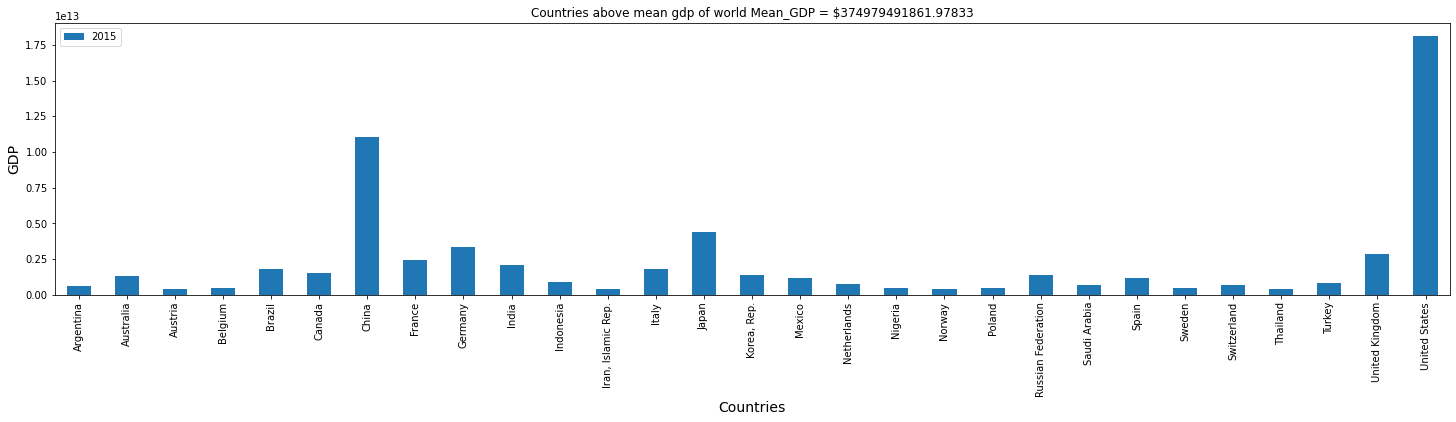

In [ ]:
# Ploting graph for the countries above mean GDP.

plt.rcParams['figure.figsize']=(25,5)
country_above_mean_gdp.plot(kind='bar')

plt.title(f'Countries above mean gdp of world Mean_GDP = ${Mean_GDP}')
plt.xlabel('Countries',fontsize=14)
plt.ylabel('GDP',fontsize=14)
plt.show()

##***Inferrence***


---


1. The above bar chart shows GDP of the countries with GDP above mean GDP of the world(374 BIllion USD approx).

2. Here we have represented the countries from the Groups like G7, G20 which are amongst the biggeset economies of the world.

Mean per capita

In [ ]:
# Mean per capita GDP
# Creating data set by droping unwanted data on indicator code NY.GDP.PCAP.CD

graph_3b=main_data.loc[main_data['Indicator Code']=='NY.GDP.PCAP.CD','2015'].drop(['Heavily indebted poor countries (HIPC)', 'High income',
                                                                                   'Least developed countries: UN classification', 'Low & middle income', 
                                                                                   'Low income', 'Lower middle income','Middle income','World','Arab World',
                                                                                   'East Asia & Pacific','East Asia & Pacific (excluding high income)',
                                                                                   'Europe & Central Asia','Europe & Central Asia (excluding high income)',
                                                                                   'European Union','Euro area','Latin America & Caribbean',
                                                                                   'Latin America & Caribbean (excluding high income)','Middle East & North Africa',
                                                                                   'Middle East & North Africa (excluding high income)','North America',
                                                                                   'OECD members','Least developed countries: UN classification','South Asia',
                                                                                   'Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)',
                                                                                   'Upper middle income'],axis=0).dropna()



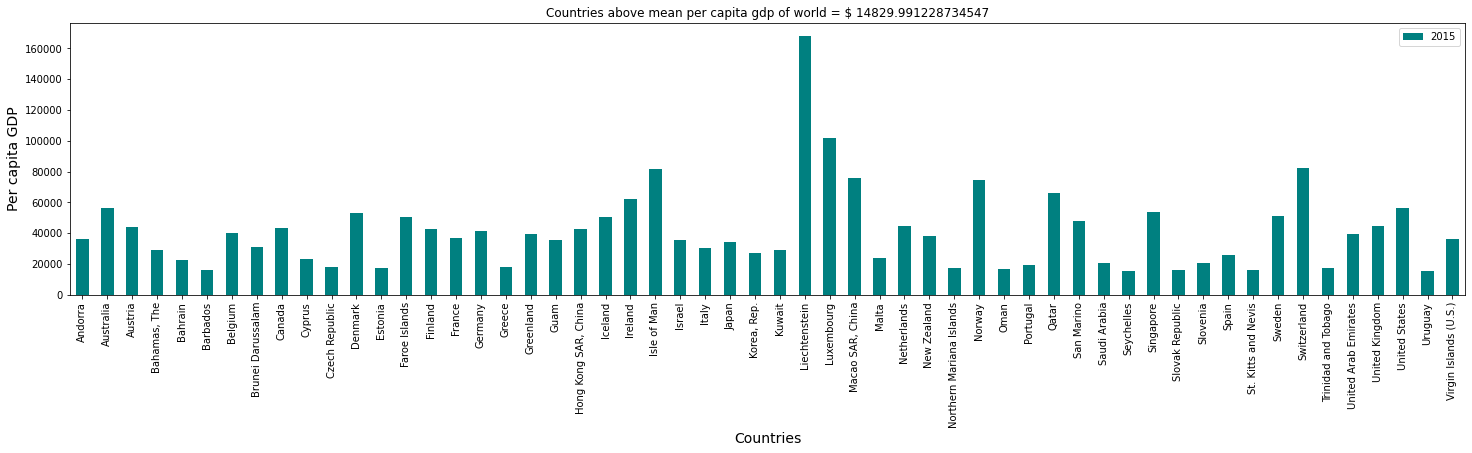

In [ ]:
# Ploting graph for the countries above mean GDP.

df_1 = graph_3b.to_frame(name="2015")
country_above_mean_pcgdp=df_1[df_1['2015']>np.mean(df_1['2015'])]
mean_percapita_gdp=np.mean(df_1['2015'])
plt.rcParams['figure.figsize']=(25,5)
country_above_mean_pcgdp.plot(kind='bar',color='Teal')
plt.title(f'Countries above mean per capita gdp of world = $ {mean_percapita_gdp}')
plt.xlabel('Countries',fontsize=14)
plt.ylabel('Per capita GDP',fontsize=14)
plt.show()

##***Inferrence***


---


Here we have shown the countries with per capita income more than mean per capita of the world(14800 USD approx.)

THe length of the bar represents the per capiita of each country.

We can clearly Liechtenstein have the highest per capita income in the world (160k USD approx.)

Q3. Calculate the no. of countries which belongs to different income group?   ,eg:
*   High income
*   low income



In [ ]:
# Using Data from path 2 and creating df.
Countries_incomegroup=country_df[['Income Group','Short Name']].groupby(country_df[['Income Group','Short Name']]['Income Group']).agg({'Short Name':'count'})
Countries_incomegroup.rename(columns = {'Income Group':'new_col1', 'Short Name':'new_col2'}, inplace = True)
Countries_incomegroup


,new_col2
Income Group,
High income: OECD,31
High income: nonOECD,44
Low income,34
Lower middle income,50
Upper middle income,55


##***Inferrence***

---




bold text

We can clearly see that most countries fall in the middle income group , 105 to be precise.

There are about 75 countries which fall in the high income group , most of these countries are from Europe and north america.

Q4. Calculate the persentage of different income group in the world?

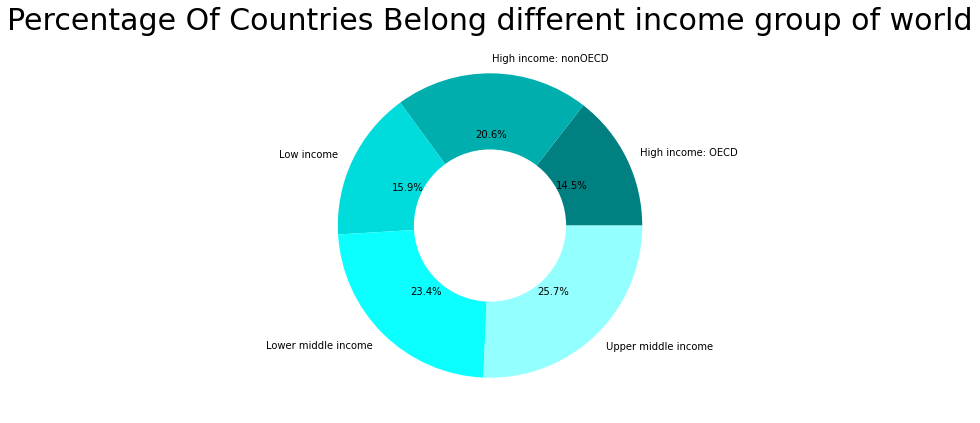

In [ ]:
# Got the data from above outcome

Income = ['High income: OECD','High income: nonOECD','Low income','Lower middle income','Upper middle income']
data = [31,44,34,50,55]

# Creating Doughnut chart for presenting the percentage of differnet income group.

fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = Income,autopct='%0.1f%%',radius=1, colors = ['#008080','#00AEAE', '#00DCDC','#0BFFFF','#94FFFF'])
plt.pie([100],colors=['w'],radius=0.5)

plt.title('Percentage Of Countries Belong different income group of world',color='Black', fontsize = 30)
 
# show plot
plt.show()

##***Inferrence***


---


Here we can see,

35.1% of the countries are in high income group.

Roughly 1/4th of the world countries are in middle income countries.

More then 1/3rd of the countries are low income countries.


Q5. Show different income groups on the world map?

In [ ]:
# creating a df from path 2
df_country = pd.read_csv(path2)

In [ ]:
# Appending values according to the string in a list.

allocation = []

for i in df_country['Income Group']:
  if i == "High income: nonOECD" or i == "High income: OECD":
    allocation.append(4)
  elif i == 'Upper middle income':
    allocation.append(3)
  elif i == 'Lower middle income':
    allocation.append(2)
  elif i == 'Low income':
    allocation.append(1)
  else:
    allocation.append(0)
df_country["allocation"] = allocation

# Using the plotly.graph_objects to plot the values of income groups over the world map to make a chloropleth.
# Giving country code to plotly so it can read code and match it with the inbuilt graph and further data to add in the chloropleth. 

fig = go.Figure(data=go.Choropleth(
    locations = df_country['Country Code'],
    z = df_country["allocation"],
    text = df_country['Short Name'],
    colorscale = 'teal',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Economy<br>Class ',
))

# Making the layout of the map and giving annotations.
fig.update_layout(
    title_text='World Economy Class',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text = 'Low Income = 1, Lower Middle Income = 2, Upper Middle Income = 3, High income = 4 ',
        showarrow = False
    )]
)

fig.show()

##***Inferrence***


---


Here wee can see all the countries in the world marked in different colour , representing the four income groups.

From the above world map its very avident that most high income countries are from europe and north america.

And most low income countries are from africa.

And the middle income countries are concentrated in middle east , east asia and south america.


Q6. Calculate percentage share of GDP with different income classes?




In [ ]:
#Creating dataframe for the indicator code NY.GDP.MKTP.CD 
GDP_Share =Income_df[Income_df['Indicator Code']=='NY.GDP.MKTP.CD']
GDP_Share.loc[['High income', 'Middle income', 'Low income', 'Lower middle income',],['2015']]
name = ['High income', 'Middle income', 'Low income', 'Lower middle income',]
quantity=[4.757751e+13,2.679605e+13,4.023901e+11,6.017050e+12]



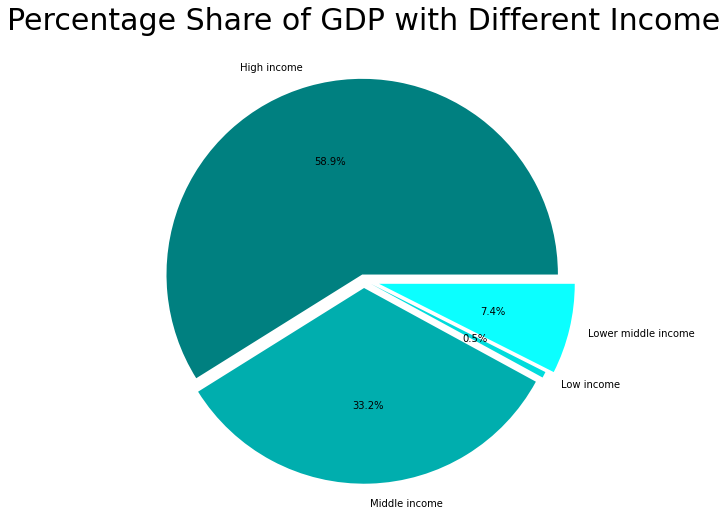

In [ ]:
#Ploting the percentage of share in pie chart
fig = plt.figure(figsize =(12,9))
plt.pie(quantity,labels=name,autopct='%0.1f%%', explode = [0.03,0.04,0.04,0.08],colors = ['#008080','#00AEAE', '#00DCDC','#0BFFFF'])
plt.title('Percentage Share of GDP with Different Income', fontsize = 30)
plt.show()

##***Inferrence***


---


From the above pie chart its very clear that high income countries despite being less in numbers(1/4th) controls roughly 60% of the worlds GDP.

Low income countries despite being 1/3rd in numbers controls only about 0.5% of the Global GDP. Which tells alot about the status of education in these countries.



###*Education EDA*

---



---



---



Q1 Show the trend for the enrollment at primary level over the years

In [ ]:
# Extracting data and creating df for the indicator SE.PRM.UNER
no_primary_enrollment =Income_df[Income_df['Indicator Code']=='SE.PRM.UNER']
graph_4a=no_primary_enrollment.transpose()
graph_4a.drop(['Indicator Name','Indicator Code'],axis=0,inplace=True)
graph_4a.dropna(inplace=True)


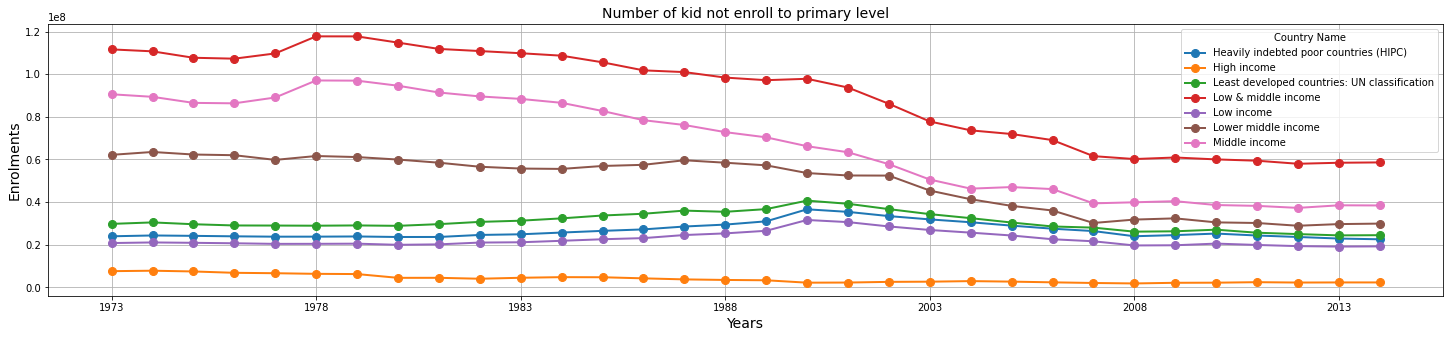

In [ ]:
#Ploting the trend for last few years
plt.rcParams['figure.figsize']=(25,5)
graph_4a.plot(linewidth=2,
    linestyle='-',
    marker='o',markersize=8)
plt.title('Number of kid not enroll to primary level',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Enrolments',fontsize=14)
plt.grid(True)

plt.show()


# Above function will create and display the graph after successful execution.  
# ylabel and xlabel:- Label of Y-axis and x-axis.
# grid:- 'True' for displaying grid.
# linewidth:- thickness of trend lines.
# linestyle :- the style of the lines.
# marker:- used to show a trend or mark an important value.  

##***Inferrence*** :- 

---





1.   Overall trend is downward, which shows the improvement in the enrollment at primary level.
2.  It has been extremenly low for High income group, which shows the high income group favours good education.
3.  The trensd shows for the  lower and middle group the number of children out of school at primary level has been constantly decling over the decade but for some reason it has been stagnant for some reason.





Q2. Show the trend at all the level i.e Primary,Secondry and Tertiary for female student

In [ ]:
# first last Thirty years i.e. 1985-2015  - columns.
# for girls enr0llment primary, secondary, and tartiary - indicator code.
# for girls transtition data  p-s and s-t  - indicator code.
# region-wise, income-wise. region name, income-wise

girl_eduction_income=Income_df.copy()
girl_education_income_notnull=girl_eduction_income.loc[:,['Indicator Code','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']].dropna()
girl_education_income_primary=girl_education_income_notnull[girl_education_income_notnull['Indicator Code']=='SE.PRE.ENRL.FE']
girl_education_income_primary.drop(['Indicator Code'],axis=1,inplace=True)
graph_2a=girl_education_income_primary.transpose()


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# for secondry
girl_education_income_secondry=girl_education_income_notnull[girl_education_income_notnull['Indicator Code']=='SE.SEC.ENRL.FE']
girl_education_income_secondry.drop(['Indicator Code'],axis=1,inplace=True)
graph_2b=girl_education_income_secondry.transpose()


In [ ]:
# for tertiary
girl_education_income_tertiary=girl_education_income_notnull[girl_education_income_notnull['Indicator Code']=='SE.TER.ENRL.FE']
girl_education_income_tertiary.drop(['Indicator Code'],axis=1,inplace=True)
graph_2c=girl_education_income_tertiary.transpose()


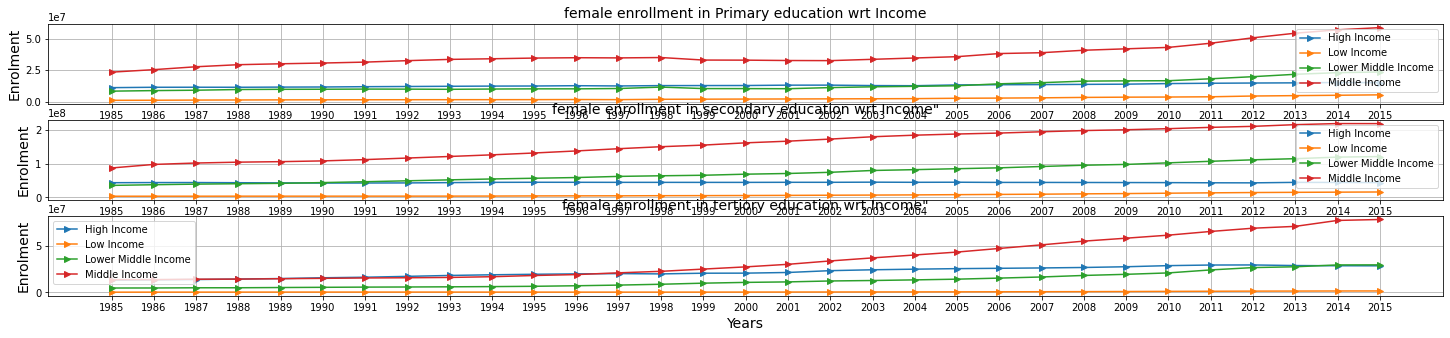

In [ ]:
# Subplotting the chart of all three female enrollment wrt income

plt.subplot(3,1,1)
plt.plot(graph_2a, marker = ">")
plt.rcParams['figure.figsize']=(15,15)
plt.legend(['High Income','Low Income','Lower Middle Income','Middle Income'])
plt.title('female enrollment in Primary education wrt Income',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Enrolment',fontsize=14)
plt.grid(True)


plt.subplot(3,1,2)
plt.plot(graph_2b, marker = ">")
plt.rcParams['figure.figsize']=(15,15)
plt.legend(['High Income','Low Income','Lower Middle Income','Middle Income'])
plt.title('female enrollment in secondary education wrt Income"',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Enrolment',fontsize=14)
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(graph_2c,marker = ">")
plt.rcParams['figure.figsize']=(15,15)
plt.legend(['High Income','Low Income','Lower Middle Income','Middle Income'])
plt.title('female enrollment in tertiory education wrt Income"',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Enrolment',fontsize=14)
plt.grid(True)

plt.show()   



# Above function will create and display the graph after successful execution.  
# ylabel and xlabel:- Label of Y-axis and x-axis.
# grid:- 'True' for displaying grid.
# marker:- used to show a trend or mark an important value.  

##***Inferrence***

---


1.   Number of female getting enrolled in primary, secondry and tertiary level is showing increasing trend in all the income group over the years,it shows the awareness toward the girl education is increasing.  

2. The increse in the participation of females in the tertiory education has been a dream run almost making it a logarithmic graph in positive side.

3. Where as the performance for the middle income country in tertiory level education has left so much to be desired . But middle income countries has done well in primary as well secndry education.

4. The main conserning point has been the low income groups as their numbers are alomst the same they were half a century ago in the tertiary education , with hardly any improvment in primary level education.



Q3. Analyse the trend for teacher to  pupil ration over different income group

In [ ]:
#Extracting Data and creating dataframe for the analysis wih indicator code SE.PRM.TCHR.FE.ZS
no_primary_enrollment =Income_df[Income_df['Indicator Code']=='SE.PRM.TCHR.FE.ZS']
graph_4b=no_primary_enrollment.transpose()
graph_4b.drop(['Indicator Name','Indicator Code'],axis=0,inplace=True)
graph_4b.dropna(inplace=True)


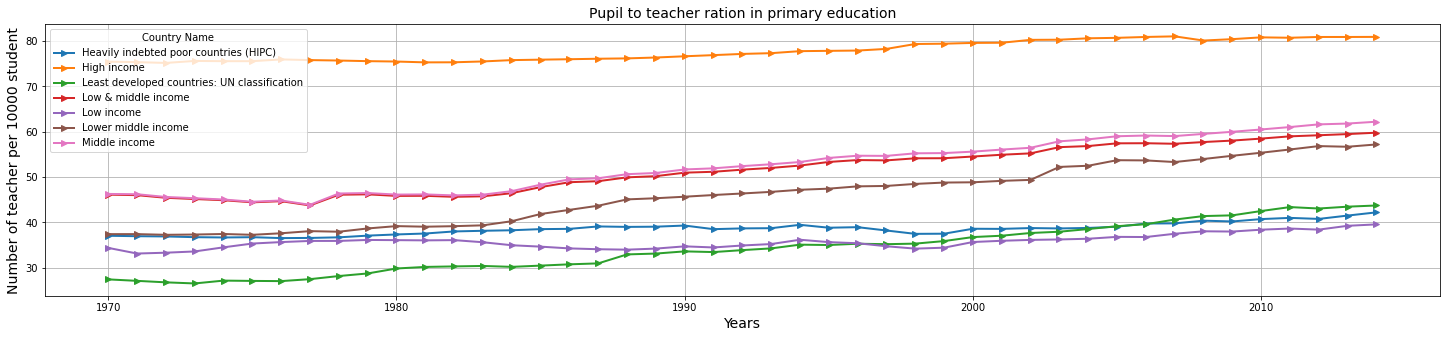

In [ ]:
#Ploting the tredn

plt.rcParams['figure.figsize']=(25,5)
graph_4b.plot(linewidth=2,
    linestyle='-',
    marker='>',markersize=6,grid=True)
plt.title('Pupil to teacher ration in primary education',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Number of teacher per 10000 student',fontsize=14)
plt.show()

# Above function will create and display the graph after successful execution.  
# kind:- Type of graph.
# ylabel and xlabel:- Label of Y-axis and x-axis.
# grid:- 'True' for displaying grid.
# linewidth:- thickness of trend lines.
# linestyle :- the style of the lines.
# marker:- used to show a trend or mark an important value.                

##***Inferrence:-***

---



---



1.   The number of teacher are inreasing after 1990 over all the income group. 
2.   With the increase in GDP, per capita income and awareness towards education, the teacher to pupil ration is increasing in lower and middle income as well.
3.A healthy number for the teacher to puple 






Q4. Show what percent of GDP, each country spend on Education

In [ ]:
# Extraction of data and creating Dataframe with indicator code SE.XPD.TOTL.GD.ZS
exp1_1=pd.read_csv(path3)
exp1_1.set_index('Indicator Code',inplace=True)
exp2_1=exp1_1.loc[['SE.XPD.TOTL.GD.ZS'],['Country Name','Country Code','1999', '2000', '2001', '2002', '2003', '2004', '2005','2006', '2007', '2008', '2009', '2010']]
exp2_1.set_index('Country Name',inplace=True)
exp3_1=exp2_1.drop(['Heavily indebted poor countries (HIPC)', 'High income','Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income','Middle income','World','Arab World','East Asia & Pacific','East Asia & Pacific (excluding high income)','Europe & Central Asia','Europe & Central Asia (excluding high income)','European Union','Euro area','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Middle East & North Africa','Middle East & North Africa (excluding high income)','North America','OECD members','Least developed countries: UN classification','South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)','Upper middle income'],axis=0).dropna()
exp3_1.drop('Country Code',axis=1,inplace=True)
exp4_1=exp3_1.transpose()

exp4_1 # Final Data Frame


Country Name,Argentina,Armenia,Austria,Azerbaijan,Benin,Colombia,Cote d'Ivoire,Cuba,Cyprus,Czech Republic,Denmark,Finland,France,"Gambia, The",Hungary,Iceland,"Iran, Islamic Rep.",Ireland,Israel,Italy,Kyrgyz Republic,"Macao SAR, China",Mauritius,Mexico,Moldova,Nepal,Netherlands,Norway,Peru,Poland,Portugal,Qatar,Slovak Republic,South Africa,Spain,Sweden,Switzerland,Tajikistan,Thailand,Togo,Tunisia,United Kingdom
1999,4.51408,2.23619,6.13795,4.21217,2.62048,4.42809,4.09449,6.75508,4.71968,3.68879,7.94089,5.86605,5.63791,1.56513,4.58184,6.47105,4.21502,4.13706,6.42082,4.53071,4.08522,3.69231,3.94140,3.66202,4.66255,2.89182,4.55543,6.94283,3.43849,4.60226,5.03018,4.34530,4.11247,5.87260,4.27280,6.92362,4.89592,2.07659,4.83249,4.18744,6.27099,4.06374
2000,4.58360,2.77633,5.60472,3.85399,2.88743,3.50333,3.70380,7.70486,4.89278,3.66536,8.06556,5.72785,5.49934,1.46587,4.87720,6.50071,4.03044,4.15121,6.11352,4.29632,3.50837,3.67962,3.81796,4.13686,4.48639,2.97546,4.62613,6.45563,3.22061,4.99383,5.18057,3.72598,3.87199,5.44197,4.17798,6.81987,4.78606,2.32863,5.25327,4.51075,6.20198,4.10980
2001,4.82829,2.46081,5.58878,3.50342,3.24010,3.70624,3.67073,8.35785,5.03351,3.76072,8.22460,5.86572,5.43332,1.15810,4.93060,6.79293,4.07214,4.09048,6.37600,4.66489,3.85419,2.73401,3.17742,4.42858,4.84691,3.71315,4.74774,6.84949,3.02927,5.32958,5.32830,3.20019,3.94199,5.16125,4.11710,6.68097,4.96211,2.37658,4.81336,4.18628,6.20183,4.17893
2002,4.01195,2.13892,5.54010,3.15449,2.94995,4.27376,4.08827,9.57120,5.48652,3.98989,8.21461,6.03654,5.42365,1.44292,5.18930,7.42179,4.48675,4.10482,6.46481,4.43326,4.44547,2.86199,3.11636,4.63879,5.49791,3.14940,4.86549,7.44218,2.81606,5.39542,5.24233,3.84656,4.25106,5.04762,4.13762,7.00070,5.32322,2.77580,3.86464,4.00874,5.79003,4.71955
2003,3.53420,2.15119,5.38185,3.28615,3.12000,4.33062,3.96629,9.94078,6.65670,4.15177,8.10361,6.15726,5.71401,1.36338,5.80140,7.32641,4.37868,4.19275,6.36291,4.55713,4.47541,2.79765,4.47930,5.18379,5.42490,3.11736,5.09818,7.41803,2.94266,5.33174,5.28399,3.37394,4.21721,4.85395,4.16962,6.85111,5.53856,2.42263,3.72402,4.19424,6.81673,4.88927
2004,3.48735,2.48406,5.31006,3.44766,3.50598,4.07620,4.12571,10.26828,6.08196,4.01744,8.18589,6.18712,5.63953,1.03450,5.35554,7.22387,4.29025,4.49043,5.94646,4.39221,4.62243,2.24566,4.45841,4.80197,6.77109,3.17343,5.11404,7.31065,2.95703,5.35610,5.05463,3.46259,4.10813,5.05277,4.15031,6.71100,5.45846,2.77208,4.03337,3.63333,6.72078,4.80557
2005,3.84376,2.71551,5.27167,2.97462,3.63625,3.99684,4.10655,10.55769,6.19600,3.89627,8.06515,6.05031,5.50596,1.13918,5.34253,7.41831,4.20294,4.52713,5.74743,4.24864,4.86898,2.29064,4.19193,4.90865,7.16273,3.36306,5.15510,6.86503,2.83619,5.42866,5.05968,3.95517,3.76522,5.05164,4.12810,6.55354,5.22361,3.51215,3.94087,3.39375,6.45157,5.01561
2006,4.11043,2.71188,5.26237,2.55551,3.50185,3.89228,4.00060,9.05729,6.22760,4.22046,7.74031,5.92485,5.45172,1.20949,5.32153,7.34941,4.42045,4.54536,5.74666,4.53330,5.54013,2.21271,3.82530,4.75853,7.49893,3.60789,5.09234,6.37218,2.65529,5.20488,4.91537,2.70639,3.71354,5.07026,4.15923,6.40877,4.98269,3.40348,4.05069,3.66957,6.43859,5.04410
2007,4.44269,3.01825,5.18300,2.54928,3.23094,4.05938,4.25834,11.86829,6.25248,3.87684,7.61055,5.67344,5.43310,1.30851,5.16341,7.08195,4.73687,4.71708,5.48117,4.11737,6.46234,2.05986,3.18354,4.73334,8.29343,3.51766,4.93602,6.53488,2.62688,4.85855,4.93507,2.45016,3.52932,4.97252,4.23648,6.20952,4.71263,3.41328,3.60168,3.69752,6.46552,4.96506
2008,4.84291,3.17115,5.29572,2.44093,3.80054,3.91051,4.36058,14.05908,6.72402,3.74839,7.48215,5.83806,5.43274,3.52742,4.99513,7.26275,4.06044,5.43746,5.51684,4.40868,5.91293,2.20476,3.06561,4.84117,8.23733,3.80427,5.09357,6.27821,2.86546,5.02508,4.69879,4.22977,3.52674,4.86486,4.48577,6.38620,4.89597,3.45983,3.50739,3.42958,6.27219,4.95671


In [ ]:
#Heat map 
cm = sns.light_palette("Teal", as_cmap=True)
exp4_1.style.background_gradient(cmap=cm).set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



Country Name,Argentina,Armenia,Austria,Azerbaijan,Benin,Colombia,Cote d'Ivoire,Cuba,Cyprus,Czech Republic,Denmark,Finland,France,"Gambia, The",Hungary,Iceland,"Iran, Islamic Rep.",Ireland,Israel,Italy,Kyrgyz Republic,"Macao SAR, China",Mauritius,Mexico,Moldova,Nepal,Netherlands,Norway,Peru,Poland,Portugal,Qatar,Slovak Republic,South Africa,Spain,Sweden,Switzerland,Tajikistan,Thailand,Togo,Tunisia,United Kingdom
1999,4.51,2.24,6.14,4.21,2.62,4.43,4.09,6.76,4.72,3.69,7.94,5.87,5.64,1.57,4.58,6.47,4.22,4.14,6.42,4.53,4.09,3.69,3.94,3.66,4.66,2.89,4.56,6.94,3.44,4.60,5.03,4.35,4.11,5.87,4.27,6.92,4.90,2.08,4.83,4.19,6.27,4.06
2000,4.58,2.78,5.60,3.85,2.89,3.50,3.70,7.70,4.89,3.67,8.07,5.73,5.50,1.47,4.88,6.50,4.03,4.15,6.11,4.30,3.51,3.68,3.82,4.14,4.49,2.98,4.63,6.46,3.22,4.99,5.18,3.73,3.87,5.44,4.18,6.82,4.79,2.33,5.25,4.51,6.20,4.11
2001,4.83,2.46,5.59,3.50,3.24,3.71,3.67,8.36,5.03,3.76,8.22,5.87,5.43,1.16,4.93,6.79,4.07,4.09,6.38,4.66,3.85,2.73,3.18,4.43,4.85,3.71,4.75,6.85,3.03,5.33,5.33,3.20,3.94,5.16,4.12,6.68,4.96,2.38,4.81,4.19,6.20,4.18
2002,4.01,2.14,5.54,3.15,2.95,4.27,4.09,9.57,5.49,3.99,8.21,6.04,5.42,1.44,5.19,7.42,4.49,4.10,6.46,4.43,4.45,2.86,3.12,4.64,5.50,3.15,4.87,7.44,2.82,5.40,5.24,3.85,4.25,5.05,4.14,7.00,5.32,2.78,3.86,4.01,5.79,4.72
2003,3.53,2.15,5.38,3.29,3.12,4.33,3.97,9.94,6.66,4.15,8.10,6.16,5.71,1.36,5.80,7.33,4.38,4.19,6.36,4.56,4.48,2.80,4.48,5.18,5.42,3.12,5.10,7.42,2.94,5.33,5.28,3.37,4.22,4.85,4.17,6.85,5.54,2.42,3.72,4.19,6.82,4.89
2004,3.49,2.48,5.31,3.45,3.51,4.08,4.13,10.27,6.08,4.02,8.19,6.19,5.64,1.03,5.36,7.22,4.29,4.49,5.95,4.39,4.62,2.25,4.46,4.80,6.77,3.17,5.11,7.31,2.96,5.36,5.05,3.46,4.11,5.05,4.15,6.71,5.46,2.77,4.03,3.63,6.72,4.81
2005,3.84,2.72,5.27,2.97,3.64,4.00,4.11,10.56,6.20,3.90,8.07,6.05,5.51,1.14,5.34,7.42,4.20,4.53,5.75,4.25,4.87,2.29,4.19,4.91,7.16,3.36,5.16,6.87,2.84,5.43,5.06,3.96,3.77,5.05,4.13,6.55,5.22,3.51,3.94,3.39,6.45,5.02
2006,4.11,2.71,5.26,2.56,3.50,3.89,4.00,9.06,6.23,4.22,7.74,5.92,5.45,1.21,5.32,7.35,4.42,4.55,5.75,4.53,5.54,2.21,3.83,4.76,7.50,3.61,5.09,6.37,2.66,5.20,4.92,2.71,3.71,5.07,4.16,6.41,4.98,3.40,4.05,3.67,6.44,5.04
2007,4.44,3.02,5.18,2.55,3.23,4.06,4.26,11.87,6.25,3.88,7.61,5.67,5.43,1.31,5.16,7.08,4.74,4.72,5.48,4.12,6.46,2.06,3.18,4.73,8.29,3.52,4.94,6.53,2.63,4.86,4.94,2.45,3.53,4.97,4.24,6.21,4.71,3.41,3.60,3.70,6.47,4.97
2008,4.84,3.17,5.30,2.44,3.80,3.91,4.36,14.06,6.72,3.75,7.48,5.84,5.43,3.53,5.00,7.26,4.06,5.44,5.52,4.41,5.91,2.20,3.07,4.84,8.24,3.80,5.09,6.28,2.87,5.03,4.70,4.23,3.53,4.86,4.49,6.39,4.90,3.46,3.51,3.43,6.27,4.96


Q5. Show the correlation of GDP, Unemployment and illiterate labour force

In [ ]:
nn=pd.read_csv(path3)# World,China,India,United States,Germany,Euro area
nn.set_index('Indicator Code',inplace=True)
nn2=nn.loc[['SE.ADT.1524.LT.ZS','NY.GDP.PCAP.CD','SL.UEM.TOTL.ZS','SL.TLF.TOTL.IN'],['Country Name','2010']]
World={'GDP percapita':[9.516347e+03,4.560513e+03,1.345770e+03,4.837388e+04,4.178556e+04,3.761772e+04],
       'total unemployment':[6.081802e+00,4.200000e+00,3.600000e+00,4.837388e+04,7.000000e+00,1.013016e+01],
       'total illiterate workforce':[3.181296e+09,7.799515e+08,4.706091e+08,1.570211e+08,4.201639e+07,1.614402e+08]}

# Correlation DF
cor=pd.DataFrame(World,index=['World','China','India','United States','Germany','Euro area'])
print(cor) # this is Df

#Making correlation
final_cor=cor.corr()
print(final_cor) # this is correlated df


               GDP percapita  total unemployment  total illiterate workforce
World               9516.347            6.081802                3.181296e+09
China               4560.513            4.200000                7.799515e+08
India               1345.770            3.600000                4.706091e+08
United States      48373.880        48373.880000                1.570211e+08
Germany            41785.560            7.000000                4.201639e+07
Euro area          37617.720           10.130160                1.614402e+08
                            GDP percapita  total unemployment  \
GDP percapita                    1.000000            0.572886   
total unemployment               0.572886            1.000000   
total illiterate workforce      -0.513668           -0.262447   

                            total illiterate workforce  
GDP percapita                                -0.513668  
total unemployment                           -0.262447  
total illiterate workforce   

Text(0.5, 1.0, 'Correlation of GDP,Illetrate work force and total unemployment')

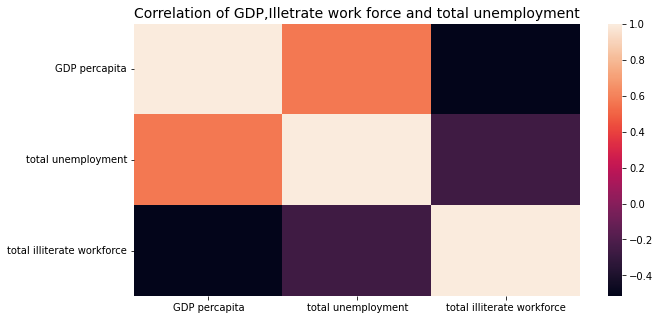

In [ ]:
#making Correleation map
plt.figure(figsize=(10,5))
sns.heatmap(final_cor)
plt.title('Correlation of GDP,Illetrate work force and total unemployment',fontsize=14)


##***Inferrence***

---



---



1. As the GDP increases the number of illeterate labourforce decreses, that's why they are negetively correlated.

2. From the corelation we can obseve that as the total unemployment decreases 
  as per capita income increases, so they are negatively corelated.




###***Population growth across different income group with time***

---



---



---



Q1. Show the relation of Income on Population Growth

In [ ]:
# Extracting Data and creating dataframe with indicator code SP.POP.GROW  
population_growth =Income_df[Income_df['Indicator Code']=='SP.POP.GROW']
population_growth.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)
graph_1=population_growth.transpose()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



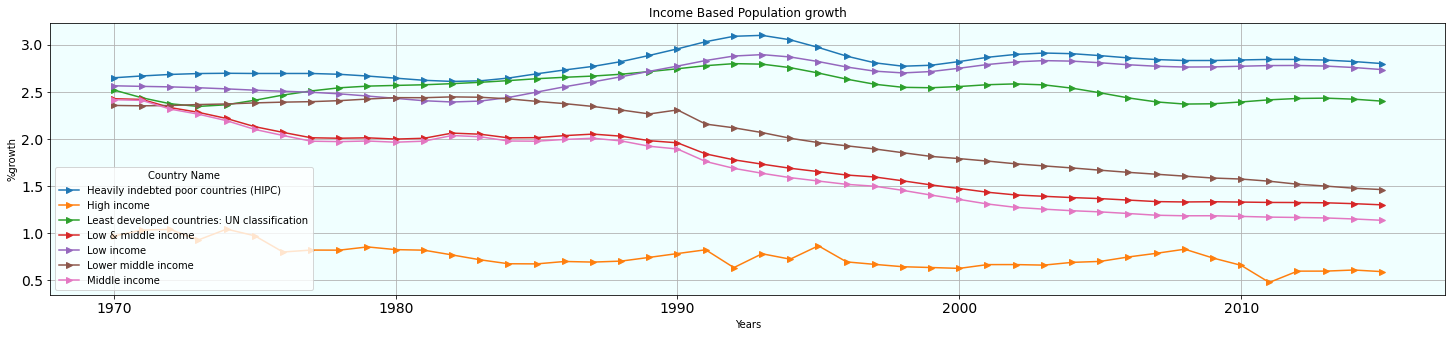

In [ ]:
# Using plot() from pandas module to plot a line graph.
# this plot function is just the extension to the plot() in matplotlib.

plt.rcParams['figure.figsize']=(25,5)
graph_1.plot( kind="line",xlabel = "Years" , ylabel = "%growth",
               title="Income Based Population growth",   
               fontsize = 14,figsize=(25,5),
                 grid=True,linewidth =1.5, 
                marker = ">").patch.set_facecolor('#f0ffff')

# Above function will create and display the graph after successful execution. 
# Also we've called another function i.e., patch.set_facecolor() with the plot object, 
# this helps us to change the background colour of the plot.
# kind:- Type of graph.
# ylabel and xlabel:- Label of Y-axis and x-axis.
# grid:- 'True' for displaying grid.
# linewidth:- thickness of trend lines.
# marker:- used to show a trend or mark an important value.                

##***Inferrence***

---





1. The population growth rate for high income group has been in a narrow range of 0.5% to 1% .

2. Lower income groups saw a increase of 0.5 % from 2.5% to 3% till 1990s after that the trend gets reverted.

3. Middle income group saw an steady decline from 2.5% in 1970 to below 1.5% in the year 2010.

 

###***Case study for big Economies for Expenditure on Education and their learning outcomes based on data by PISA***



















Q1. Analyse the expenditure on education by the government and its outcome for the big economys of the world.

In [ ]:
# Cleaning data for further use using indicator code SE.XPD.TOTL.GD.ZS
clean_data1=new_data[['Country Name','Indicator Code','1990','2000','2010']]
Sorted1_1=clean_data1[clean_data1['Indicator Code']=='SE.XPD.TOTL.GD.ZS'].set_index(['Country Name'])
Sorted2_1=Sorted1_1.copy()
Sorted2_1.drop("Indicator Code",axis=1,inplace=True)

Graphk=Sorted2_1.loc[['India','Japan','United States','Germany','United Kingdom','Canada','France']]
Graphk2=Graphk.transpose()


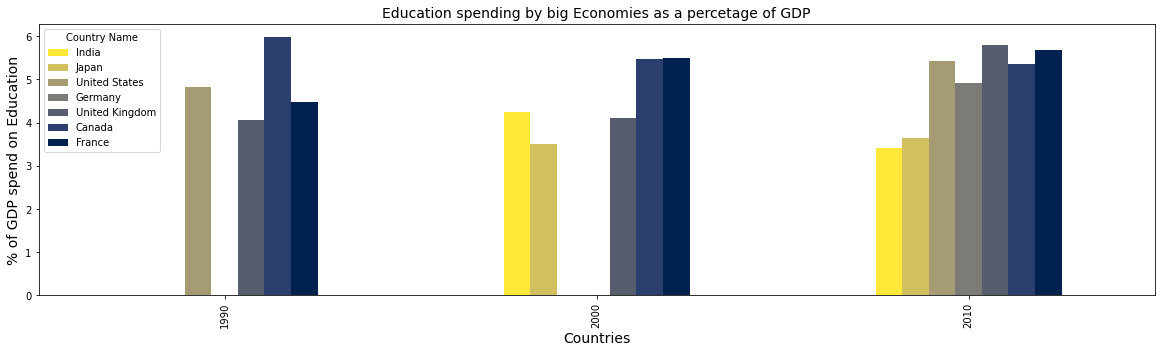

In [ ]:
# Ploting bar chart for education spending by big Economies.
plt.rcParams['figure.figsize']=(20,5)
Graphk2.plot(kind='bar',colormap="cividis_r")
plt.title('Education spending by big Economies as a percetage of GDP',fontsize=14)
plt.xlabel('Countries',fontsize=14)
plt.ylabel('% of GDP spend on Education',fontsize=14)
plt.show()

##***Inferrence***

---






In this analysis of the big economies of the world we can clearly see a pattern of high spending on education.

Which goes on to say a county with good economic stability prioritize education of its people and its workk force.

The average range for these big economies for spending on education is in 4 to 6%.

#Summary 

---






1. *Analysis on Income Group*

From our previous analysis we came to know that Higher income countries constitute only about 1/4 in numbers and still controls 60% of world GDP. 
Despite making ⅓  in numbers, lower income countries have only about 0.5% of Global GDP share.  
This parity shows on multiple indicators such as population growth rate, Female enrolment in Tertiary Education, Teacher to Pupil Ratio, Mortality Rate.
On one hand the overall education level of high income countries has always been good, But over the years, especially over the last two decades the female enrolment  in tertiary education and labor force has increased exponentially.
On the other hand, lower income countries are still struggling for  any  significant improvement  in the education sector.
Middle income countries have shown consistent improvement in overall education, Be it Teacher to pupil ratio, percentage of population getting access to primary education, Female participation in all levels of education.
2. *Analysis by  Region*

From our analysis on the global GDP with respect to income groups on the world map  we can clearly see that high income countries are concentrated in Europe and North america.  
Most of the  low income Countries  are in Africa with few exceptions in the Middle  East(Afghanistan).
Middle income countries are spread  throughout the world with high concentration in Asia, with representation in Europe, Latin America,  Africa .
From all this analysis we are stating the obvious, Europe and North America being the center of education in the world due their world renowned institutes attracting talent from all across the Globe.
Whereas sub saharan Africa is constantly struggling to feed their population. With not enough resources to allocate towards education these countries have to rely on organizations such as World Bank and its sister organizations for basic necessities like food and education.
This trend also shows in the mortality rate being high in africa and low in europe and north america, and lack of education and awareness contributes towards high population growth in africa and relatively low population growth rate in europe and north america.
With some analysts stating that this century will be Asia’s century.Most of the emerging economies are from Asia, these emerging economies countries are spending a large percentage of their GDP towards educating their children and reeducating their labor force. 

##**Conclussion:-**

---






1.   The economic condition of a country and region highly influence the education of that country or region.
2.   An educated labour force always paved path to the growth and development of nation.
3.   Some of the important steps that must be taken, for the socio-economic     development are, Increasing the spending on Education, Awareness for the enrollment on every level, Increase teacher to pupil ratio and awareness toward the population growth.


#Suggestions 

1. Awareness programmes should be incorporated in order to have a sustainable population growth so that proper resources and facilities  can be provided to everyone.

2. There should be more spending on education as a percentage of GDP by the respective governments.
3. As we have analyzed that  the skilled and educated workforce can contribute better in the development of the nation, we must be  focused towards education of children and re-education of the labor force.
4. In order to increase the quality of education we should  follow the norms suggested by the world bank for Teacher to Pupil ratio.
Better data collection helps in better data analysis and providing solutions to ongoing problems and upcoming problems, so we should try to collect the proper data.